In [324]:
# Import modules 
import matplotlib as mpl
import numpy as np 
import pandas as pd 
import datetime
from sklearn import cluster
from matplotlib import pyplot as plt 
from scipy.spatial.distance import cdist, pdist

# Make plots in Notebook
%matplotlib inline

# Load marketing_promo.csv
df = pd.read_csv('/Users/mikeallimb/Documents/Data_science/Farfetch/data_science_task/cluster_data.csv', 
                 header=0, index_col=0,sep=",")
# Format data for scikit-learn
data = df.values

# Perform Kmeans with 1 to 20 clusters
K = range(1,20)
KM = [cluster.KMeans(n_clusters=k).fit(data) for k in K]
centroids = [k.cluster_centers_ for k in KM]

# Distance between data point and centroids 
D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
#Distance between each data point and centroid
dist = [np.min(D,axis=1) for D in D_k]
# Average distance between data point and centroid 
avgWithinSS = [sum(d)/data.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(data)**2)/data.shape[0]
bss = tss-wcss
kIdx = 6-1

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

test = 95
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
ax.plot(K[kIdx], test, marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')


,a,b,c,d,e
0,0.202196,1.210328,-0.362121,6.774688,10.471171
1,-18.387879,6.307993,0.570526,-2.800453,0.791784
2,-0.353418,-2.519796,-1.434224,-2.460677,-1.848893
3,0.681851,-2.437309,-2.324559,-3.930883,0.126415
4,-1.398950,-0.306058,0.700491,1.280063,-0.367040


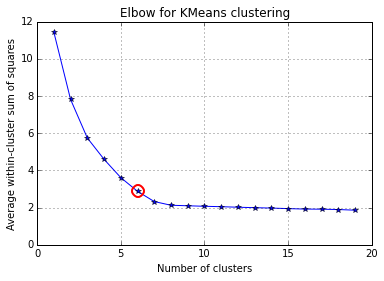

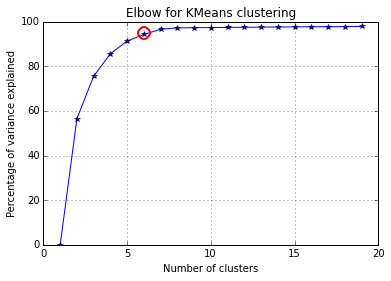

In [325]:
from scipy.spatial.distance import cdist, pdist
data = df.values

# Perform Kmeans with 1 to 20 clusters
K = range(1,20)
KM = [cluster.KMeans(n_clusters=k).fit(data) for k in K]
centroids = [k.cluster_centers_ for k in KM]

# Distance between data point and centroids 
D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
# Distance between each data point and centroid
dist = [np.min(D,axis=1) for D in D_k]
# Average distance between data point and centroid 
avgWithinSS = [sum(d)/data.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(data)**2)/data.shape[0]
bss = tss-wcss

kIdx = 6-1

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

test = 95
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
ax.plot(K[kIdx], test, marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

In [338]:
data.shape

(800, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab6a290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ad20d10>]], dtype=object)

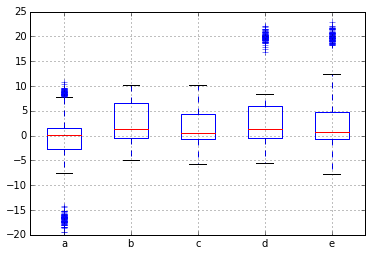

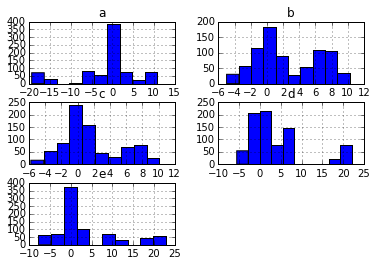

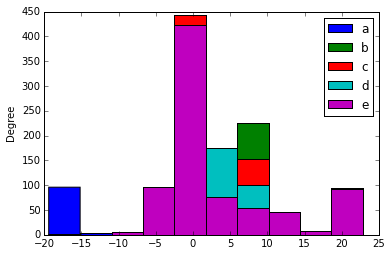

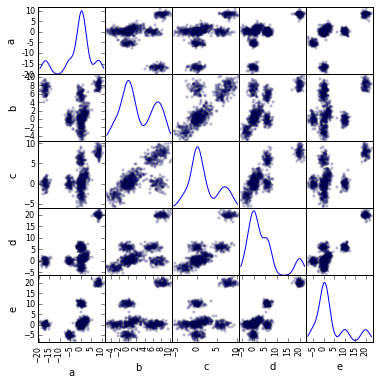

In [339]:
df.boxplot()

df.hist()

df.plot(kind='hist')

#df[['b','c']].plot(kind='hist')

#df[['a','d','e']].plot(kind='hist')

from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [238]:
df.describe()

,a,b,c,d,e
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-1.408342,2.481644,1.640549,3.834483,3.381425
std,6.849860,3.897975,3.548427,6.822418,7.476862
min,-19.385151,-4.982372,-5.786045,-5.583204,-7.732816
25%,-2.663111,-0.448952,-0.614847,-0.459470,-0.688404
50%,0.078303,1.242171,0.614295,1.288900,0.756951
75%,1.536407,6.478028,4.317826,5.936949,4.703692
max,10.816078,10.217713,10.108888,22.114096,22.833183


In [329]:
k = 6
kmeans = cluster.KMeans(n_clusters= k, n_init=10)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [334]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[ -5.25564387e+00,   1.87604993e-02,   4.61188675e-02,
         -1.52566457e-01,  -5.02753710e+00],
       [  8.30188910e+00,   8.16052096e+00,   7.89498183e+00,
          1.99149216e+01,   2.00093231e+01],
       [  2.55828841e-01,  -1.81898629e-01,  -1.57771643e-03,
          5.95420715e+00,   9.95426567e+00],
       [ -1.67961971e+01,   7.11335351e+00,  -5.26311677e-02,
         -1.57666437e-01,   1.05269317e-01],
       [  6.14903449e-01,  -7.24542834e-01,  -6.72849315e-01,
         -6.86534095e-01,   5.27539820e-01],
       [  4.41695785e-01,   5.05967107e+00,   5.32880760e+00,
          5.22005428e+00,   3.80308651e-01]])

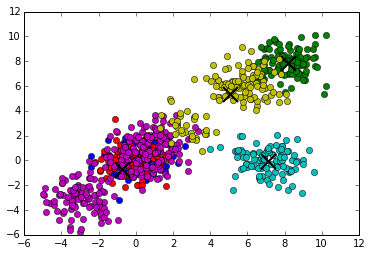

In [337]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
from matplotlib import pyplot
import numpy as np

#for i in range(k):
#    # select only data observations with cluster label == i
#    ds = data[np.where(labels==i)]
    # plot the data observations
#    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
#    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
#    pyplot.setp(lines,ms=15.0)
#    pyplot.setp(lines,mew=2.0)
#pyplot.show()

for i in range(k):
    # select only data observations with cluster label == i
    ds = data[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,1],ds[:,2],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,1],centroids[i,2],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

#for i in range(k):
    # select only data observations with cluster label == i
#    ds = data[np.where(labels==i)]
    # plot the data observations
#    pyplot.plot(ds[:,2],ds[:,3],'o')
    # plot the centroids
#    lines = pyplot.plot(centroids[i,2],centroids[i,3],'kx')
    #make the centroid x's bigger
#    pyplot.setp(lines,ms=15.0)
#    pyplot.setp(lines,mew=2.0)
#pyplot.show()

#for i in range(k):
    # select only data observations with cluster label == i
#   ds = data[np.where(labels==i)]
    # plot the data observations
#    pyplot.plot(ds[:,3],ds[:,4],'o')
    # plot the centroids
#    lines = pyplot.plot(centroids[i,2],centroids[i,3],'kx')
    #make the centroid x's bigger
#    pyplot.setp(lines,ms=15.0)
#    pyplot.setp(lines,mew=2.0)
#pyplot.show()

#for i in range(k):
    # select only data observations with cluster label == i
#    ds = data[np.where(labels==i)]
    # plot the data observations
#    pyplot.plot(ds[:,0],ds[:,4],'o')
    # plot the centroids
#    lines = pyplot.plot(centroids[i,2],centroids[i,3],'kx')
    #make the centroid x's bigger
#    pyplot.setp(lines,ms=15.0)
#    pyplot.setp(lines,mew=2.0)
#pyplot.show()

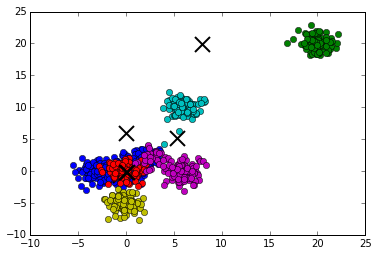

In [243]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


for i in range(k):
    # select only data observations with cluster label == i
    ds = data[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,3],ds[:,4],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,2],centroids[i,3],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.show()

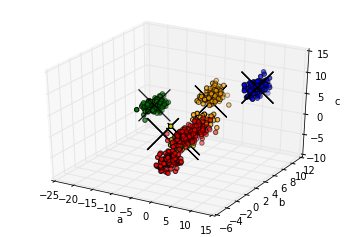

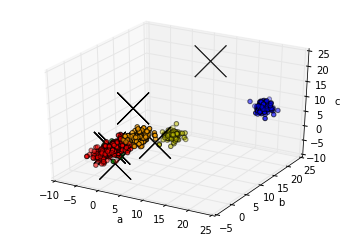

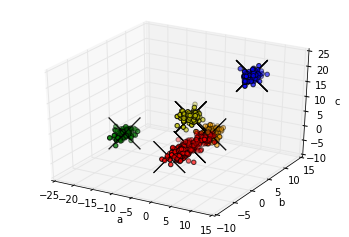

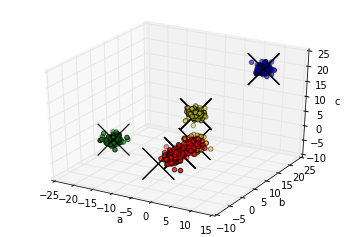

In [245]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c in [(0, 'r'), (1, 'b'), (2, 'g'), (3, 'y'), (4, 'orange')]:
    ds = data[np.where(labels==i)]
    xs = ds[:,0]
    ys = ds[:,1]
    zs = ds[:,2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('c')
    
for x in range(k):
    ax.scatter(centroids[:k,0], centroids[:k,1], centroids[:k,2], c='black', marker='x', s=1000)
plt.show()

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c in [(0, 'r'), (1, 'b'), (2, 'g'), (3, 'y'), (4, 'orange')]:
    ds = data[np.where(labels==i)]
    xs = ds[:,3]
    ys = ds[:,4]
    zs = ds[:,2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('c')
    
for x in range(k):
    ax.scatter(centroids[:k,2], centroids[:k,3], centroids[:k,4], c='black', marker='x', s=1000)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c in [(0, 'r'), (1, 'b'), (2, 'g'), (3, 'y'), (4, 'orange')]:
    ds = data[np.where(labels==i)]
    xs = ds[:,0]
    ys = ds[:,2]
    zs = ds[:,4]
    ax.scatter(xs, ys, zs, c=c, marker='o')
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('c')
    
for x in range(k):
    ax.scatter(centroids[:k,0], centroids[:k,2], centroids[:k,4], c='black', marker='x', s=1000)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c in [(0, 'r'), (1, 'b'), (2, 'g'), (3, 'y'), (4, 'orange')]:
    ds = data[np.where(labels==i)]
    xs = ds[:,0]
    ys = ds[:,3]
    zs = ds[:,4]
    ax.scatter(xs, ys, zs, c=c, marker='o')
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('c')
    
for x in range(k):
    ax.scatter(centroids[:k,0], centroids[:k,3], centroids[:k,4], c='black', marker='x', s=1000)
plt.show()
